In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F

import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

from torch.utils.data import random_split
from torch.utils.data import DataLoader


In [2]:
### softmax dimension 0 or 1
outputs = torch.tensor([[1., 4],  [2, 1]])
print(outputs)
probs = F.softmax(outputs, dim=1).data
print(probs)
torch.max(probs, dim=1)

tensor([[1., 4.],
        [2., 1.]])
tensor([[0.0474, 0.9526],
        [0.7311, 0.2689]])


torch.return_types.max(
values=tensor([0.9526, 0.7311]),
indices=tensor([1, 0]))

In [3]:
### Download the datasets

dataset = MNIST(root='data/', download=True)
print(len(dataset))
# 60000 training examples (10000 of them will be set as validation examples)

test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))
# 10000 test examples

print(dataset[0])
# dataset is a pair of 28x28px img (PIL.Image.Image object) & label.

60000
10000
(<PIL.Image.Image image mode=L size=28x28 at 0x267AA1E8C70>, 5)


Label: 5


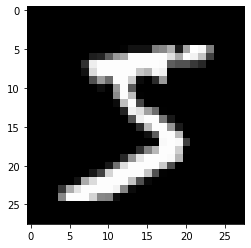

In [4]:
### visualizing the dataset
import matplotlib.pyplot as plt
%matplotlib inline

image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:',label)

In [5]:
### Prepare the datasets and dataloader in PyTorch tensor

dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())
# img_tensor & label

train_ds, val_ds = random_split(dataset, [50000, 10000])
test_ds = MNIST(root='data/', train=False, transform=transforms.ToTensor())

# create data loacders to load the data in batches (randomly)
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [6]:
for images, labesl in train_loader:
    break
images.shape

torch.Size([128, 1, 28, 28])

In [7]:
### Put the images into a model

input_size, num_classes = 28*28, 10

model = nn.Linear(input_size, num_classes)
# weights, bias created by calling nn.Linear: randomly sampled and requires_grad=True

for images, labels in train_loader:
    images_rs = images.reshape(128, 784)
    # model accepts only 2-dim tensors
    outputs = model(images_rs)
    print(outputs)
    break

tensor([[ 0.2595, -0.1676,  0.0709,  ..., -0.2886, -0.0500, -0.0768],
        [ 0.1087,  0.2250,  0.0792,  ...,  0.0142, -0.2137,  0.1818],
        [ 0.4075,  0.3955,  0.0151,  ..., -0.0822,  0.0297,  0.1132],
        ...,
        [ 0.3497, -0.0737, -0.0167,  ..., -0.0469,  0.1133, -0.0098],
        [ 0.2593, -0.1952,  0.1152,  ...,  0.0030,  0.0611,  0.0406],
        [ 0.4891,  0.0855,  0.0954,  ..., -0.2282, -0.0248,  0.0454]],
       grad_fn=<AddmmBackward0>)


In [8]:
### Customize nn.Module with fixed input size

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

# print(model.linear.weight.shape, model.linear.bias.shape)
# list(model.parameters())

In [53]:
### Prediction

for images, labels in train_loader:
    outputs = model(images)
    print(outputs.shape)


probs = F.softmax(outputs, dim=1)

max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

torch.Size([80, 10])
tensor([2, 1, 5, 3, 6, 1, 3, 9, 2, 3, 4, 5, 8, 9, 6, 7, 4, 4, 5, 6, 1, 0, 3, 1,
        7, 9, 0, 8, 0, 3, 4, 7, 9, 5, 1, 9, 7, 6, 9, 5, 6, 5, 4, 2, 8, 8, 6, 6,
        3, 3, 2, 0, 5, 4, 9, 0, 3, 8, 9, 8, 3, 9, 4, 6, 3, 6, 9, 0, 0, 8, 3, 8,
        6, 3, 1, 1, 3, 9, 1, 3])
tensor([0.5128, 0.8478, 0.4936, 0.8479, 0.7290, 0.9210, 0.8505, 0.2570, 0.9865,
        0.6553, 0.4720, 0.6785, 0.6464, 0.5795, 0.2237, 0.2824, 0.8577, 0.4257,
        0.2593, 0.8978, 0.8789, 0.9146, 0.4853, 0.3508, 0.9190, 0.7314, 0.8891,
        0.4119, 0.8302, 0.8402, 0.7926, 0.5347, 0.4726, 0.5938, 0.8396, 0.5278,
        0.8381, 0.6596, 0.3383, 0.3210, 0.8462, 0.7854, 0.3570, 0.2531, 0.4766,
        0.2935, 0.4134, 0.5087, 0.3562, 0.7510, 0.8916, 0.8745, 0.7332, 0.9625,
        0.3420, 0.8052, 0.6535, 0.3737, 0.6417, 0.6567, 0.7434, 0.6067, 0.7098,
        0.8454, 0.4953, 0.6978, 0.7346, 0.9702, 0.9659, 0.4092, 0.6797, 0.4639,
        0.7864, 0.9554, 0.8914, 0.7930, 0.5376, 0.4461, 0.7445, 0.

In [10]:
### Evaluation 1 : Accuracy
# boolean based evaluation metric; why not good as loss function?

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

accuracy(outputs, labels)

# not differentiable (torch.max, '==') = gradient descent not applicable
# does not take the probability(or confidence) into account

tensor(0.0703)

In [11]:
### Evaluation 2 : Cross-Entropy
# cross-entropy : negative logarithm of the predicted probability of the correct label

loss_fun = F.cross_entropy
loss = loss_fun(outputs, labels)
print(loss)

tensor(2.3372, grad_fn=<NllLossBackward0>)


Training the model

```
for epoch in range(num_epochs):
    # Training phase
    for bath in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients

    # Validation phase
    for batch in val_loader:
        # Generate 
        # Calculate loss
    
    # Calculate average validation loss & metrics

    # Log epoch, loss & metrics for inspection
```

In [12]:
### Training the model

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()        # change the weights
            optimizer.zero_grad()   # gradients = 0

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [21]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [17]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [22]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 1.9447888135910034, 'val_acc': 0.6297468543052673}

In [24]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.0500, val_acc: 0.8095
Epoch [1], val_loss: 0.9904, val_acc: 0.8140
Epoch [2], val_loss: 0.9408, val_acc: 0.8178
Epoch [3], val_loss: 0.8988, val_acc: 0.8219
Epoch [4], val_loss: 0.8629, val_acc: 0.8254


In [26]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8317, val_acc: 0.8288
Epoch [1], val_loss: 0.8045, val_acc: 0.8314
Epoch [2], val_loss: 0.7804, val_acc: 0.8346
Epoch [3], val_loss: 0.7589, val_acc: 0.8361
Epoch [4], val_loss: 0.7397, val_acc: 0.8390


In [27]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7223, val_acc: 0.8404
Epoch [1], val_loss: 0.7066, val_acc: 0.8427
Epoch [2], val_loss: 0.6923, val_acc: 0.8440
Epoch [3], val_loss: 0.6791, val_acc: 0.8448
Epoch [4], val_loss: 0.6669, val_acc: 0.8467


In [28]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6557, val_acc: 0.8476
Epoch [1], val_loss: 0.6453, val_acc: 0.8486
Epoch [2], val_loss: 0.6357, val_acc: 0.8501
Epoch [3], val_loss: 0.6266, val_acc: 0.8522
Epoch [4], val_loss: 0.6182, val_acc: 0.8534


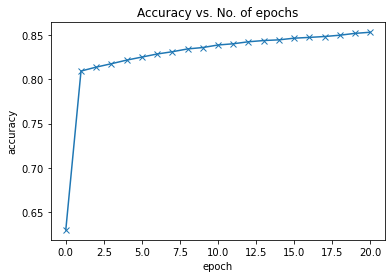

In [29]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Shape: torch.Size([1, 28, 28])
Label: 7


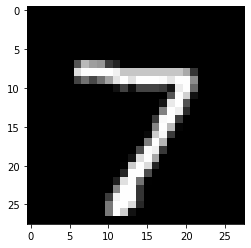

In [36]:
### Testing with individual images

test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [39]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [40]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item() 

Label: 7 , Predicted: 7


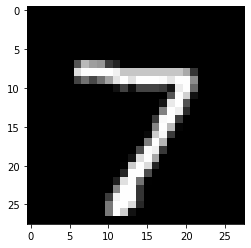

In [41]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


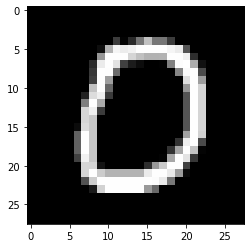

In [42]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


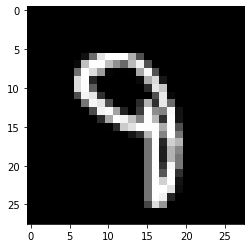

In [43]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


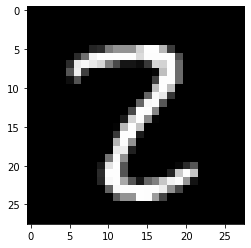

In [44]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [46]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5775555372238159, 'val_acc': 0.867968738079071}

In [49]:
### Saving and Loading the model

torch.save(model.state_dict(), 'mnist-logistic.pth') # weights and bias

model2 = MnistModel() # initiated model
print(evaluate(model2, test_loader))

model2.load_state_dict(torch.load('mnist-logistic.pth'))
print(evaluate(model2, test_loader))

{'val_loss': 2.317476987838745, 'val_acc': 0.10800781100988388}
{'val_loss': 0.5775555372238159, 'val_acc': 0.867968738079071}
